In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
print("Tensorflow Version",tf.__version__)
from keras.models import load_model
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import sentencepiece
import pandas as pd
from tqdm import tqdm
from scipy.special import softmax
import warnings
warnings.filterwarnings("ignore")


from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax


from tqdm import tqdm
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch


import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output



import ipywidgets as widgets
from IPython.display import display



import pandas as pd
from tqdm import tqdm
from scipy.special import softmax
from tabulate import tabulate

import pyfiglet

[nltk_data] Downloading package stopwords to C:\Users\AKSHAY KUMAR
[nltk_data]     DHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tensorflow Version 2.13.0


In [2]:


stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

# Regular expression pattern to match mentions
mention_pattern = r'@[\w\d_]+'

# Function to remove mentions from a comment
def remove_mentions(comment):
    return re.sub(mention_pattern, '', comment)





text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)




def preprocess1(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [3]:

# # Folder containing CSV files
# folder_path = "D:\\internship\\data\\Instagram\\Conor Marcus"

# # Get a list of all files in the folder
# file_list = os.listdir(folder_path)

# # Filter out only CSV files
# csv_files = [file for file in file_list if file.endswith('.csv')]

# # Initialize an empty list to store DataFrames
# dfs = []

# # Loop through each CSV file, read its content, and store in the list of DataFrames
# for csv_file in csv_files:
#     csv_file_path = os.path.join(folder_path, csv_file)
#     df = pd.read_csv(csv_file_path)
#     dfs.append(df)

# # Concatenate the list of DataFrames into a single merged DataFrame
# merged_df_insta = pd.concat(dfs, ignore_index=True)




# #data cleaning



# #renaming coloumns 
# new_column_names = {
#     '="Comment Text"': 'Comment Text',
#     '="Date"': 'Date',
#     '="Username"':'Username',
#     '="User Id"':'User Id'
    
# }
# merged_df_insta.rename(columns=new_column_names, inplace=True)

# selected_columns = ['User Id','Username','Comment Text','Date']
# merged_df_insta=merged_df_insta[selected_columns]
# #Formating the User Id,Username and Comment text coloumn 
# merged_df_insta['Comment Text'] = merged_df_insta['Comment Text'].str.lstrip('="').str.rstrip('"')
# merged_df_insta['User Id'] = merged_df_insta['User Id'].str.lstrip('="').str.rstrip('"')
# merged_df_insta['Username'] = merged_df_insta['Username'].str.lstrip('="').str.rstrip('"')
# #Formating the Data coloumn. 
# merged_df_insta['Date'] = pd.to_datetime(merged_df_insta['Date'], format='="%m/%d/%Y, %I:%M:%S %p"')
# merged_df_insta['Date'] = merged_df_insta['Date'].dt.strftime('%Y-%m-%d %H:%M')
# desired_username= 'therisingmusic'
# merged_df_insta_with_reply = merged_df_insta[merged_df_insta['Username'] == desired_username]
# merged_df_insta_without_reply=merged_df_insta[merged_df_insta['Username'] != desired_username]
 

In [4]:
# # Folder containing CSV files
# folder_path = "D:\\internship\\data\\Facebook\\Conor Marcus"

# # Get a list of all files in the folder
# file_list = os.listdir(folder_path)

# # Filter out only CSV files
# csv_files = [file for file in file_list if file.endswith('.csv')]

# # Initialize an empty list to store DataFrames
# dfs = []

# # Loop through each CSV file, read its content, and store in the list of DataFrames
# for csv_file in csv_files:
#     csv_file_path = os.path.join(folder_path, csv_file)
#     df = pd.read_csv(csv_file_path)
#     dfs.append(df)

# # Concatenate the list of DataFrames into a single merged DataFrame
# merged_df_fb = pd.concat(dfs, ignore_index=True)


# # data cleaning



# #renaming the coloumns 
# new_column_names = {
#     'Content': 'Comment Text',
#     'CommentAt': 'Date',
#     'UserId': 'User Id',
#     'Author': 'Username'
# }
# merged_df_fb.rename(columns=new_column_names, inplace=True)

# selected_columns = ['User Id','Username','Comment Text','Date']
# merged_df_fb=merged_df_fb[selected_columns]
# #Formating the  date coloumn 
# merged_df_fb
# merged_df_fb['Date'] = pd.to_datetime(merged_df_fb['Date'], format='%m/%d/%Y %I:%M %p')
# merged_df_fb['Date'] = merged_df_fb['Date'].dt.strftime('%Y-%m-%d %H:%M')
# desired_username_fb= 'The Rising'
# merged_df_fb_with_reply = merged_df_fb[merged_df_fb['Username'] == desired_username_fb]
# merged_df_fb_without_reply=merged_df_fb[merged_df_fb['Username'] != desired_username_fb]



## User selection for desired  social platfrom and  post 

Number of Instagram posts : 298
Number of Facebook posts: 32


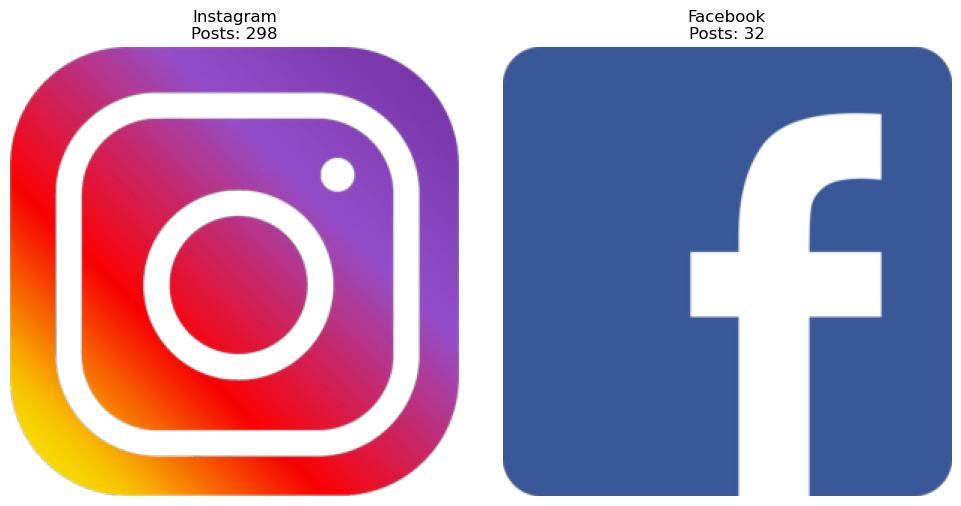

Output()

,User Id,Username,Comment Text,Date
0,9258047494,bedrosayah,Have a nice day guys :)) enjoy ur holiday 🙌😻✌❤,2019-07-19 13:46
1,11299337845,danielecorbomusic,🤟🤟,2019-07-19 13:53
2,1687751371,gmtb_music,Best of luck to everyone tomorrow 🍀🤞,2019-07-19 14:28
3,1331980614,trine.nordestgaard,Good luck Conor. We sure will watch it tomorro...,2019-07-19 17:08
4,7475003996,thetyneryan,"Great to see you all, good luck tomorrow night...",2019-07-19 18:07
5,6087902438,conormarcusmusic,"@ryan_lofthouse_music thanks Ryan, Joslyn and ...",2019-07-19 18:18
6,7730882991,fansbusted,🚀🚀🚀,2019-07-20 04:24
7,5773211297,marthamoxonn,I loved this night so much! ❤️,2019-07-20 17:42
8,1527586152,auntie_gertie,"Just remember all of you, you are all stars no...",2019-07-20 19:39
9,6087902438,conormarcusmusic,@auntie_gertie great advice so true!!!,2019-07-20 19:50


,User Id,Username,Comment Text,Date
0,533396370,Jonny Davison,I knew there was something about you the first...,2022-03-14 20:03


,User Id,Username,Comment Text,Date
0,100064657010030,Matt Winder,Awesome job bro 😎,2022-05-22 18:12
1,1386707882,Kevin Desaulniers,Flawless!!! LOVE this!,2022-05-22 16:56
2,544443019,Shemaine Kerr,Love this 🙃,2022-05-22 16:10
3,100009368735207,Lesley Green,Beautiful Conor 😊,2022-05-22 16:08


In [5]:
from IPython.display import clear_output

# Function to perform data cleaning and adjustments
def clean_and_adjust(df, platform):
    if platform == "Instagram":
        new_column_names = {
            '="Comment Text"': 'Comment Text',
            '="Date"': 'Date',
            '="Username"': 'Username',
            '="User Id"': 'User Id'
        }
        df.rename(columns=new_column_names, inplace=True)

        selected_columns = ['User Id', 'Username', 'Comment Text', 'Date']
        df = df[selected_columns]

        df['Comment Text'] = df['Comment Text'].str.lstrip('="').str.rstrip('"')
        df['User Id'] = df['User Id'].str.lstrip('="').str.rstrip('"')
        df['Username'] = df['Username'].str.lstrip('="').str.rstrip('"')

        df['Date'] = pd.to_datetime(df['Date'], format='="%m/%d/%Y, %I:%M:%S %p"')
        df['Date'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M')
        
    elif platform == "Facebook":
        new_column_names_fb = {
            'Content': 'Comment Text',
            'CommentAt': 'Date',
            'UserId': 'User Id',
            'Author': 'Username'
        }
        df.rename(columns=new_column_names_fb, inplace=True)

        selected_columns_fb = ['User Id', 'Username', 'Comment Text', 'Date']
        df = df[selected_columns_fb]

        df['Comment Text'] = df['Comment Text'].str.lstrip('="').str.rstrip('"')

        df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')
        df['Date'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M')
    
    return df

# Process Instagram data
folder_path_insta = "D:\\internship\\data\\Instagram\\Conor Marcus"
file_list_insta = os.listdir(folder_path_insta)
csv_files_insta = [file for file in file_list_insta if file.endswith('.csv')]

Instagram = []
for csv_file_insta in csv_files_insta:
    csv_file_path_insta = os.path.join(folder_path_insta, csv_file_insta)
    df_insta = pd.read_csv(csv_file_path_insta)
    df_insta = clean_and_adjust(df_insta, "Instagram")
    Instagram.append(df_insta)

num_dataframes_insta = len(Instagram)
print("Number of Instagram posts :", num_dataframes_insta)

# Process Facebook data
folder_path_fb = "D:\\internship\\data\\Facebook\\Conor Marcus"
file_list_fb = os.listdir(folder_path_fb)
csv_files_fb = [file for file in file_list_fb if file.endswith('.csv')]

Facebook = []
for csv_file_fb in csv_files_fb:
    csv_file_path_fb = os.path.join(folder_path_fb, csv_file_fb)
    df_fb = pd.read_csv(csv_file_path_fb)
    df_fb = clean_and_adjust(df_fb, "Facebook")
    Facebook.append(df_fb)

num_dataframes_fb = len(Facebook)
print("Number of Facebook posts:", num_dataframes_fb)




import matplotlib.image as mpimg
from skimage.transform import resize

# Load Instagram and Facebook logos
instagram_logo = mpimg.imread('C:\\Users\\AKSHAY KUMAR DHAR\\Downloads\\logo-ig-png-32459.png')  
facebook_logo = mpimg.imread('C:\\Users\\AKSHAY KUMAR DHAR\\Downloads\\facebook-logo-493.png')

# Define the number of posts for each platform
num_dataframes_insta = num_dataframes_insta  # Replace with the actual number of Instagram posts
num_dataframes_fb = num_dataframes_fb     # Replace with the actual number of Facebook posts


# Adjust the size of the logos
logo_size = (300, 300)  # Adjust the size as needed
instagram_logo = resize(instagram_logo, logo_size)
facebook_logo = resize(facebook_logo, logo_size)

# Create subplots for each platform
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Instagram logo with number of posts
axes[0].imshow(instagram_logo)
axes[0].set_title(f'Instagram\nPosts: {num_dataframes_insta}')
axes[0].axis('off')

# Plot Facebook logo with number of posts
axes[1].imshow(facebook_logo)
axes[1].set_title(f'Facebook\nPosts: {num_dataframes_fb}')
axes[1].axis('off')

plt.tight_layout()
plt.show()




import ipywidgets as widgets
from IPython.display import display


import pandas as pd
insta_dfs=Instagram
fb_dfs=Facebook

# Dict of dataframes
dfs = {
  'Instagram': insta_dfs,
  'Facebook': fb_dfs
}

# Widgets
# list_dropdown = widgets.Dropdown(options=list(dfs.keys()))
list_dropdown = widgets.Dropdown(options=[''] + list(dfs.keys()))
dataframe_dropdown = widgets.Dropdown()
output = widgets.Output()

def get_selected_df():
  selected_dfs = dfs[list_dropdown.value]
  selected_index = dataframe_dropdown.value
  return selected_dfs[selected_index]

def update_dataframe_dropdown():
  selected_dfs = dfs[list_dropdown.value]
  dataframe_dropdown.options = [(f"Post {i+1}", i) for i in range(len(selected_dfs))]

def handle_platform_change(change):
  update_dataframe_dropdown()


platform_label=widgets.Label("Select Platform:")
dataframe_label=widgets.Label("Select post:")
dropdowns = widgets.VBox([
    widgets.HBox([platform_label, list_dropdown]),
    widgets.HBox([dataframe_label, dataframe_dropdown])
])












def display_dataframe(change):
  

  global selected_post 
  selected_post = get_selected_df()
  
  
  display(selected_post)


display(dropdowns)
display(output)
# Set up callbacks
list_dropdown.observe(handle_platform_change, 'value') 
dataframe_dropdown.observe(display_dataframe, 'value')




Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


╔═════════════════════════════════════════════╗
║  The data have No replies from the artists  ║
╚═════════════════════════════════════════════╝
--------------------------------------------------------------------------------------------------------------------


100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

--------------------------------------------------------------------------------------------------------------------


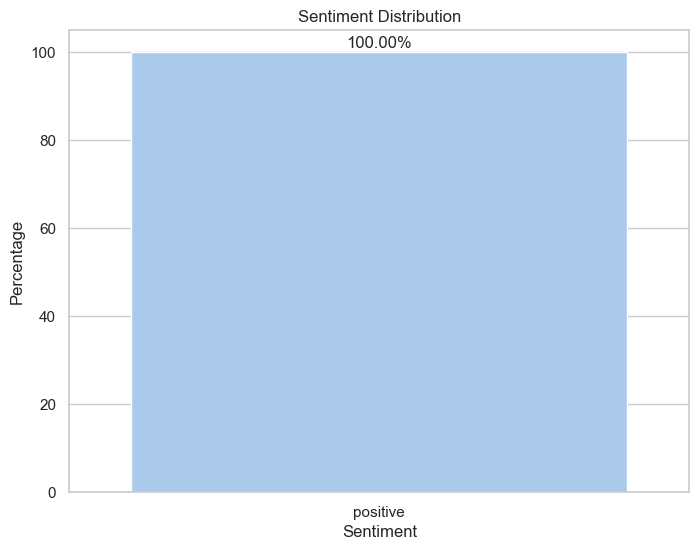

--------------------------------------------------------------------------------------------------------------------


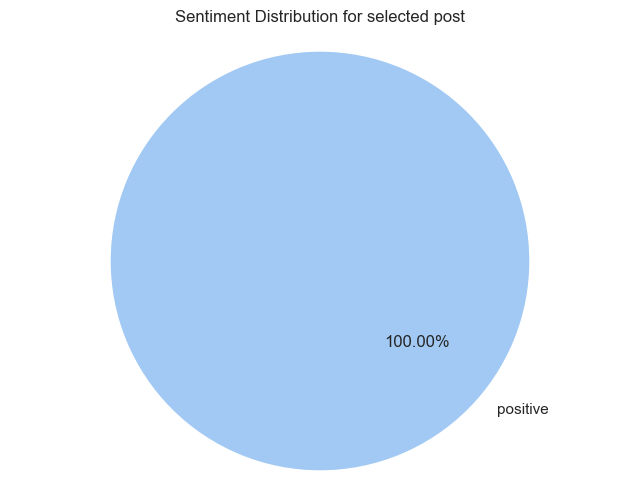

--------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------
╔══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║  The selected post has no replies from the Artists, Therefore, no further analysis of  Artist's reply    ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════════════╝


In [7]:
torch.backends.cudnn.benchmark = False
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)









def update_selected_post_data(selected_post):
    matching_rows = (selected_post['Username'] == 'conormarcusmusic') | (selected_post['Username'] == 'Conor Marcus Music')

    if matching_rows.any():
        # print('The data have replies from the artists')
        text = "The data have replies from the artists"
        width = len(text) + 4
        print('╔' + '═' * width + '╗')
        print('║  ' + text + '  ║')
        print('╚' + '═' * width + '╝')
        
        selected_post_without_reply = selected_post[~matching_rows]
        selected_post_only_with_artist_reply = selected_post[matching_rows]
        selected_post_have_no_reply = None
    else:
        # print('The data have No replies from the artists')
        text = "The data have No replies from the artists"
        width = len(text) + 4
        print('╔' + '═' * width + '╗')
        print('║  ' + text + '  ║')
        print('╚' + '═' * width + '╝')
      
        selected_post_without_reply = None
        selected_post_only_with_artist_reply = None
        selected_post_have_no_reply = selected_post

    return selected_post_without_reply, selected_post_only_with_artist_reply, selected_post_have_no_reply

# Update the other variables based on the changes in the selected_post DataFrame
selected_post_without_reply, selected_post_only_with_artist_reply, selected_post_have_no_reply = update_selected_post_data(selected_post)






print('--------------------------------------------------------------------------------------------------------------------')






# Define the sentiment labels
sentiment_labels = ['roberta_neg', 'roberta_neu', 'roberta_pos']

# Initialize an empty list to store the sentiment dictionaries
sentiment_scores_list = []

# Choose the non-empty variable dynamically
selected_post = None
if selected_post_without_reply is not None and not selected_post_without_reply.empty:
    selected_post = selected_post_without_reply
elif selected_post_have_no_reply is not None and not selected_post_have_no_reply.empty:
    selected_post = selected_post_have_no_reply
if selected_post is not None:
    # Iterate through each text in the selected variable
    for text in tqdm(selected_post['Comment Text'], total=len(selected_post)):
        if isinstance(text, str):  # Check if the value is a string
            try:
                text = preprocess1(text)
                text = preprocess(text)
                encoded_text = tokenizer(text, return_tensors='pt')
                output = model(**encoded_text)
                scores = output[0][0].detach().numpy()  # Applying softmax
                scores = softmax(scores)
                scores_dict = {label: score for label, score in zip(sentiment_labels, scores)}
                sentiment_scores_list.append(scores_dict)
            except RuntimeError:
                print(f'Broke for text: {text}')
        else:
            print(f'Skipped non-string value: {text}')

    # Convert the list of sentiment dictionaries to a DataFrame
    sentiment_df = pd.DataFrame(sentiment_scores_list)

    # Concatenate the selected variable DataFrame with the sentiment scores DataFrame
    data_with_sentiment = pd.concat([selected_post, sentiment_df], axis=1)
    data_with_sentiment.isnull().sum()
    data_with_sentiment = data_with_sentiment.dropna()
    data_with_sentiment.isnull().sum()
    
else:
    print("Both selected variables are empty.")




# Custom function to determine sentiment label
def get_sentiment(row):
    max_score = max(row['roberta_neg'], row['roberta_neu'], row['roberta_pos'])
    if max_score == row['roberta_neg']:
        return 'negative'
    elif max_score == row['roberta_neu']:
        return 'positive'
    else:
        return 'positive'

# Apply the custom function to create the 'sentiment' column
data_with_sentiment['sentiment'] = data_with_sentiment.apply(get_sentiment, axis=1)
selected_columns = ['User Id', 'Username', 'Comment Text', 'Date','sentiment']
sentiment_Rising_selected = data_with_sentiment[selected_columns]

print('--------------------------------------------------------------------------------------------------------------------')


sentiment_counts = sentiment_Rising_selected['sentiment'].value_counts()
sentiment_counts


#Calculate the percentage of each sentiment
total_samples = len(sentiment_Rising_selected)
sentiment_percentages = (sentiment_counts / total_samples) * 100


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette="pastel")

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution')

# Display percentages on the bars
for index, value in enumerate(sentiment_percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()

print('--------------------------------------------------------------------------------------------------------------------')

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution for selected post')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


data_with_sentiment.set_index('Date', inplace=True)
data_with_sentiment.index = pd.to_datetime(data_with_sentiment.index)

print('--------------------------------------------------------------------------------------------------------------------')






time_plot = data_with_sentiment[['roberta_pos', 'roberta_neg']]
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go

# Create an interactive line plot using Plotly
fig = px.line(time_plot, x=time_plot.index, y=['roberta_pos', 'roberta_neg'], labels={'x': 'Date', 'value': 'Count'},
              title='Roberta Positive vs Negative Sentiment over Time')
fig.update_layout(legend_title_text='Sentiment', legend_traceorder='reversed')

# Add scatter markers on top of the lines
scatter_pos = go.Scatter(x=time_plot.index, y=time_plot['roberta_pos'], mode='markers', name='Positive')
scatter_neg = go.Scatter(x=time_plot.index, y=time_plot['roberta_neg'], mode='markers', name='Negative')

fig.add_trace(scatter_pos)
fig.add_trace(scatter_neg)

# Enable zooming feature
fig.show(config={'scrollZoom': True})



print('--------------------------------------------------------------------------------------------------------------------')




selected_post_only_with_artist_reply




if selected_post_only_with_artist_reply is not None and not selected_post_only_with_artist_reply.empty:
    text = "The selected post have replies from the Artists "
    width = len(text) + 4
    print('╔' + '═' * width + '╗')
    print('║  ' + text + '  ║')
    print('╚' + '═' * width + '╝')
    selected_post_only_with_artist_reply.shape[0]
    print("Total number of replies:", selected_post_only_with_artist_reply.shape[0])
    print("Replies /n ", selected_post_only_with_artist_reply['Comment Text'])


    # Define the sentiment labels
    sentiment_labels = ['roberta_neg', 'roberta_neu', 'roberta_pos']

    # Initialize an empty list to store the sentiment dictionaries
    sentiment_scores_list = []

    # Iterate through each text in the 'Comment Text' column
    for text in tqdm(selected_post_only_with_artist_reply['Comment Text'], total=len(selected_post_only_with_artist_reply)):
        if isinstance(text, str):  # Check if the value is a string
            try:
                text = preprocess1(text)
                text = preprocess(text)
                encoded_text = tokenizer(text, return_tensors='pt')
                output = model(**encoded_text)
                scores = output[0][0].detach().numpy()  # Applying softmax
                scores = softmax(scores)
                scores_dict = {label: score for label, score in zip(sentiment_labels, scores)}
                sentiment_scores_list.append(scores_dict)
            except RuntimeError:
                print(f'Broke for text: {text}')
        else:
            print(f'Skipped non-string value: {text}')

    # Convert the list of sentiment dictionaries to a DataFrame
    sentiment_scores_df_reply_A = pd.DataFrame(sentiment_scores_list)

    # Concatenate the original DataFrame with the sentiment scores DataFrame
    data_with_sentiment_Artist_reply = pd.concat([selected_post_only_with_artist_reply, sentiment_scores_df_reply_A], axis=1)



    # Custom function to determine sentiment label
    def get_sentiment(row):
        max_score = max(row['roberta_neg'], row['roberta_neu'], row['roberta_pos'])
        if max_score == row['roberta_neg']:
            return 'negative'
        elif max_score == row['roberta_neu']:
            return 'positive'
        else:
            return 'positive'

    # Apply the custom function to create the 'sentiment' column
    data_with_sentiment_Artist_reply['sentiment'] = data_with_sentiment_Artist_reply.apply(get_sentiment, axis=1)
    selected_columns = ['User Id', 'Username', 'Comment Text', 'Date','sentiment']
    sentiment_of_Artist_reply = data_with_sentiment_Artist_reply[selected_columns]
    sentiment_of_Artist_reply

    sentiment_counts = sentiment_of_Artist_reply['sentiment'].value_counts()
    sentiment_counts


    #Calculate the percentage of each sentiment
    total_samples = len(sentiment_of_Artist_reply)
    sentiment_percentages = (sentiment_counts / total_samples) * 100


    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette="pastel")

    # Add labels and title
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.title('Sentiment Distribution')

    # Display percentages on the bars
    for index, value in enumerate(sentiment_percentages):
        plt.text(index, value + 1, f'{value:.2f}%', ha='center')

    # Show the plot
    plt.show()

    #----------------------------------------------------------------------------------------------------

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    colors = sns.color_palette('pastel')
    plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%.2f%%', colors=colors, startangle=140)
    plt.title('Sentiment Distribution')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    # Show the plot
    plt.show()





    time_plot1 = data_with_sentiment_Artist_reply[['roberta_pos', 'roberta_neg']]
    import plotly.express as px
    import plotly.express as px
    import plotly.graph_objects as go

    # Create an interactive line plot using Plotly
    fig = px.line(time_plot1, x=time_plot1.index, y=['roberta_pos', 'roberta_neg'], labels={'x': 'Date', 'value': 'Count'},
                title='Roberta Positive vs Negative Sentiment over Time')
    fig.update_layout(legend_title_text='Sentiment', legend_traceorder='reversed')

    # Add scatter markers on top of the lines
    scatter_pos = go.Scatter(x=time_plot1.index, y=time_plot1['roberta_pos'], mode='markers', name='Positive')
    scatter_neg = go.Scatter(x=time_plot1.index, y=time_plot1['roberta_neg'], mode='markers', name='Negative')

    fig.add_trace(scatter_pos)
    fig.add_trace(scatter_neg)

    # Enable zooming feature
    fig.show(config={'scrollZoom': True})







else:
    text = "The selected post has no replies from the Artists, Therefore, no further analysis of  Artist's reply  "
    width = len(text) + 4
    print('╔' + '═' * width + '╗')
    print('║  ' + text + '  ║')
    print('╚' + '═' * width + '╝')
    







